In [1]:
import evaluate
import json
from tqdm import tqdm
import os
from matplotlib import pyplot as plt

rouge = evaluate.load('rouge')
bleu = evaluate.load('bleu')
meteor = evaluate.load('meteor')

def evaluate_list(gens, refs):
    rouge_score = rouge.compute(predictions=gens, references=refs)
    bleu_score = None # bleu.compute(predictions=gens, references=refs)
    meteor_score = meteor.compute(predictions=gens, references=refs)
    return rouge_score, bleu_score, meteor_score

/sailhome/yuhuiz/develop/miniconda3/envs/openclip/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     /afs/cs.stanford.edu/u/yuhuiz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /afs/cs.stanford.edu/u/yuhuiz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /afs/cs.stanford.edu/u/yuhuiz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
file2metric = {}
file_names = sorted(os.listdir("cache"))
for file_name in tqdm(file_names):
    if "data_image_coco_clip" not in file_name: continue
    if not file_name.endswith(".json"): continue
    with open(os.path.join("cache", file_name), "r") as f:
        gens, refs = json.load(f)
    gens, refs = gens[0], refs[0]
    gens = [gen.replace("<|endoftext|>", "").strip() for gen in gens]
    # print(gens[:2], refs[:2])
    metrics = evaluate_list(gens, refs)
    file2metric[file_name] = metrics

 44%|████▍     | 202/456 [00:04<00:05, 42.67it/s]INFO:absl:Using default tokenizer.
INFO:absl:Using default tokenizer.
INFO:absl:Using default tokenizer.
INFO:absl:Using default tokenizer.
 45%|████▌     | 207/456 [00:24<00:42,  5.86it/s]INFO:absl:Using default tokenizer.
INFO:absl:Using default tokenizer.
100%|██████████| 456/456 [03:36<00:00,  2.11it/s]


In [5]:
sorted(file2metric.items())

[('generation_data_image_coco_clip.pkl_c1_0.1_1.json',
  ({'rouge1': 0.22955788848797448,
    'rouge2': 0.03448895965404895,
    'rougeL': 0.20511597553088295,
    'rougeLsum': 0.20495374991978224},
   None,
   {'meteor': 0.17691603893639446})),
 ('generation_data_image_coco_clip.pkl_c1_0.1_10.json',
  ({'rouge1': 0.16419005063800995,
    'rouge2': 0.014559417981347657,
    'rougeL': 0.14773751239660618,
    'rougeLsum': 0.14759896820096305},
   None,
   {'meteor': 0.126915887838823})),
 ('generation_data_image_coco_clip.pkl_c1_0.1_11.json',
  ({'rouge1': 0.17081263532306148,
    'rouge2': 0.014620174799163572,
    'rougeL': 0.1544542409261236,
    'rougeLsum': 0.15439496980741982},
   None,
   {'meteor': 0.12937932389010956})),
 ('generation_data_image_coco_clip.pkl_c1_0.1_12.json',
  ({'rouge1': 0.16514819849573098,
    'rouge2': 0.014249690096541982,
    'rougeL': 0.1484971670388135,
    'rougeLsum': 0.14847429926819036},
   None,
   {'meteor': 0.12945854040616658})),
 ('generation_

In [7]:
file2rougel = {}

for key, value in file2metric.items():
    items = key.replace(".json", "").split("_")
    modality, method, epoch = items[2], items[-3], int(items[-1])
    if (modality, method) not in file2rougel:
        file2rougel[(modality, method)] = [None] * 50
    # print(value[0])
    # file2rougel[(modality, method)][epoch - 1] = value[0]["rougeL"]
    file2rougel[(modality, method)][epoch - 1] = value[2]["meteor"]

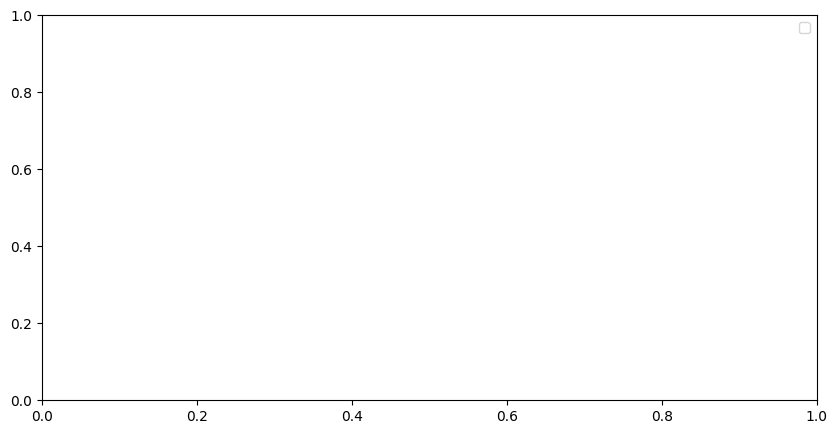

In [8]:
plt.figure(figsize=(10, 5))
for key, value in file2rougel.items():
    if "data_image_coco_clip" in key:
        plt.plot(value, label=f"{key[0]}-{key[1]}")
        print(key, max(value))
plt.legend()

# plt.figure(figsize=(10, 5))
# for key, value in file2rougel.items():
#     if "video" in key:
#         plt.plot(value, label=f"{key[0]}-{key[1]}")
#         print(key, max(value))
# plt.legend()